In [1]:
!pip install mysql-connector-python


In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
connection = mysql.connector.connect(
    user='root',
    password='1234',
    host='localhost',
    database='ecommerce',
    charset='utf8'
)

In [7]:
cursor = connection.cursor()


In [9]:
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [11]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [13]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [15]:
print("Customer Data:")
customer_data.head()

Customer Data:


,customer_id,name,city,email,phone_no,address,pin_code
0,00d0,Jacob Andersen,San Antonio,morrowronald@example.org,945.252.0903,"909 Malone Glens Suite 865 West Kyleport, VT 9...",60665
1,044d,Bonnie Hayden,Phoenix,brittany65@example.net,798-634-2748x19,"587 Erica Tunnel Vazquezland, MP 54172",32428
2,05e0,Tracey Garcia,Chicago,duncanbrittany@example.org,229.765.7671x07,Unit 9348 Box 9347 DPO AP 54894,75058
3,0784,Donna Little DDS,Dallas,gabrielle27@example.net,242-733-5198x71,"67810 Reeves Lodge Lake Benjamin, WY 00558",21937
4,081f,Jennifer Roberts,Phoenix,lrobinson@example.com,6553102624,851 Ballard Park Apt. 518 North Christopherbor...,63234


In [17]:
print("\nProduct Data:")
product_data.head()


Product Data:


,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,0005ba6,Bluetooth Headphones,Toys,Puzzles,61.61,319.49,32
1,0263317,Wireless Mouse,Books,Educational,106.99,498.99,33
2,02d0037,Keyboard,Books,Non-Fiction,58.60,327.16,67
3,0983982,External Hard Drive,Books,Fiction,135.70,166.97,83
4,0f9bc0a,Smartwatch,Clothing,Women,389.86,145.37,58


In [19]:
print("\nOrder Data:")
order_data.head()


Order Data:


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,6c69,be494d9,7.0,1039.64,Debit Card,2024-07-07 19:55:34,Delivered
1,2,a492,0f9bc0a,5.0,726.85,Cash,2024-07-25 15:03:46,Delivered
2,3,b080,4b12109,5.0,1731.20,Credit Card,2024-08-19 20:10:12,Canceled
3,4,8d87,473ab84,6.0,193.50,Debit Card,2024-08-26 00:19:05,Pending
4,5,ee46,dc8d645,4.0,997.24,Credit Card,2024-08-16 00:34:08,Delivered


In [21]:
print("\nMissing Values:")
print(customer_data.isna().sum())
print(product_data.isna().sum())
print(order_data.isna().sum())



Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [23]:
print("\nData Types:")
print(customer_data.dtypes)
print(product_data.dtypes)
print(order_data.dtypes)


Data Types:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [25]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
Q1 = order_data['quantity'].quantile(0.25)
Q3 = order_data['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


City-wise Customer Count:
city
Chicago         15
Dallas          11
Houston         13
Los Angeles      7
New York         7
Philadelphia     4
Phoenix          8
San Antonio      8
San Diego        9
San Jose        18
Name: customer_id, dtype: int64


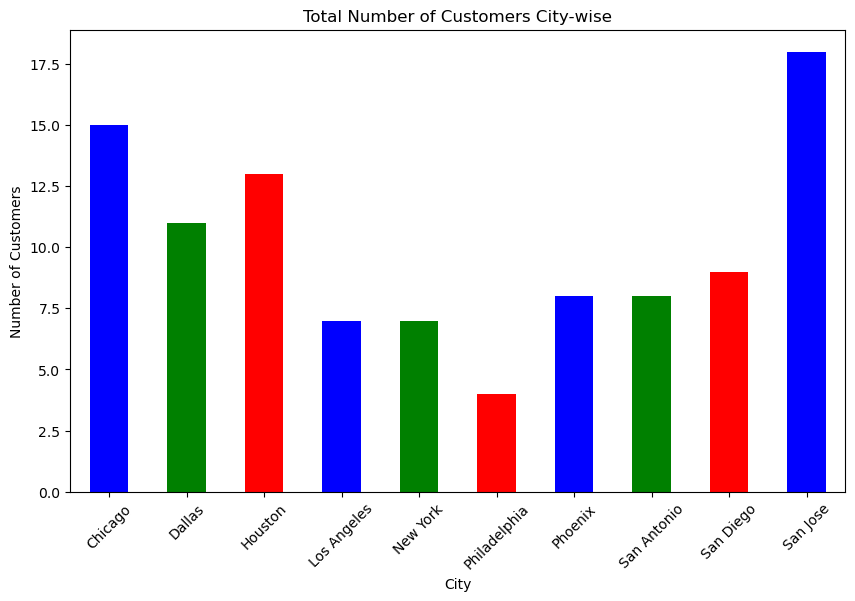

In [27]:
cleaned_order_data = order_data[(order_data['quantity'] >= lower_bound) & (order_data['quantity'] <= upper_bound)]
if 'city' in customer_data.columns:
    city_wise_customers = customer_data.groupby('city')['customer_id'].count()
    print("\nCity-wise Customer Count:")
    print(city_wise_customers)
    city_wise_customers.plot(kind='bar', figsize=(10, 6), color=['blue','green','red'])

    plt.title('Total Number of Customers City-wise')
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'city' column is not present in the customer data.")


Most Frequent Customers:
customer_id
00d0    5
0784    5
cf56    5
512f    5
1421    4
ee46    4
bf36    4
b416    4
b080    4
a492    4
Name: order_id, dtype: int64


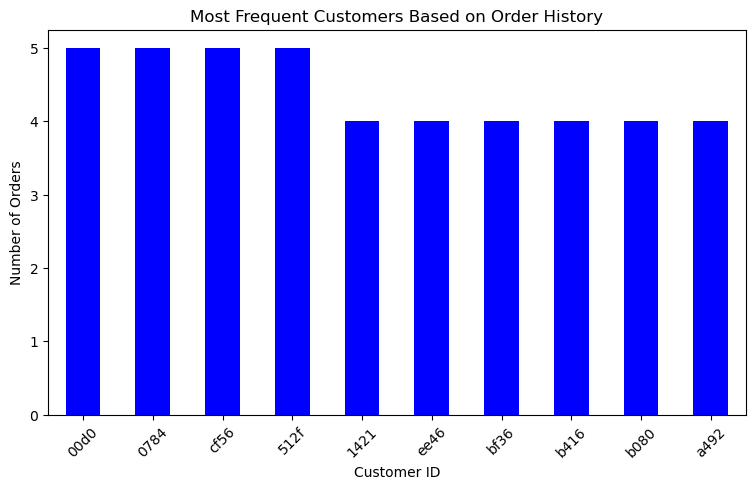

In [28]:
customer_order_counts = order_data.groupby('customer_id')['order_id'].count()
most_frequent_customers = customer_order_counts.sort_values(ascending=False).head(10)
print("\nMost Frequent Customers:")
print(most_frequent_customers)
most_frequent_customers.plot(kind='bar', figsize=(9, 5), color='blue')

plt.title('Most Frequent Customers Based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Category:
category
Books             13
Clothing          12
Electronics        8
Home & Kitchen     5
Toys              12
Name: product_id, dtype: int64


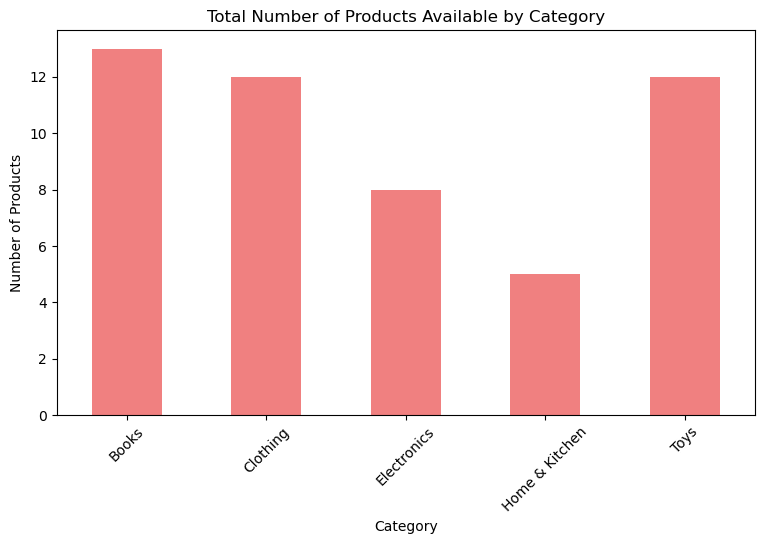

In [31]:
products_per_category = product_data.groupby('category')['product_id'].count()
print("\nTotal Number of Products by Category:")
print(products_per_category)
products_per_category.plot(kind='bar', figsize=(9, 5), color='lightcoral')

plt.title('Total Number of Products Available by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Sub-Category:
sub_category
Action Figures        3
Board Games           4
Cameras               1
Computers             5
Decor                 2
Educational           3
Fiction               5
Furniture             1
Kids                  4
Kitchen Appliances    2
Men                   4
Mobile Phones         2
Non-Fiction           5
Puzzles               5
Women                 4
Name: product_id, dtype: int64


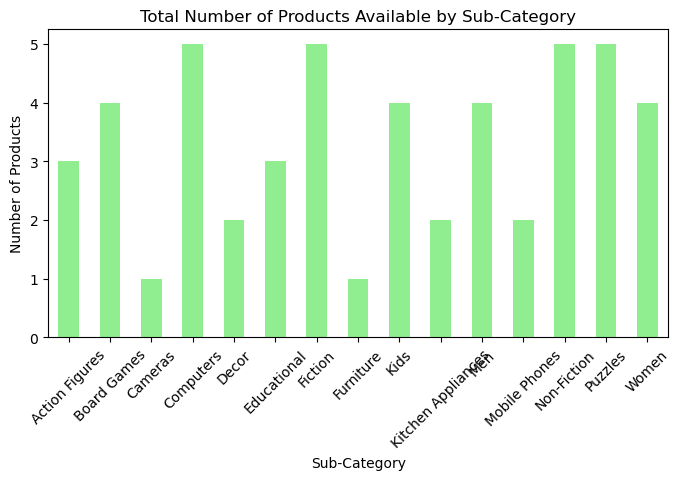

In [33]:
products_per_subcategory = product_data.groupby('sub_category')['product_id'].count()
print("\nTotal Number of Products by Sub-Category:")
print(products_per_subcategory)

products_per_subcategory.plot(kind='bar', figsize=(8,4), color='lightgreen')
plt.title('Total Number of Products Available by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


Total Number of Products by Sub-Category:
sub_category
Action Figures        3
Board Games           4
Cameras               1
Computers             5
Decor                 2
Educational           3
Fiction               5
Furniture             1
Kids                  4
Kitchen Appliances    2
Men                   4
Mobile Phones         2
Non-Fiction           5
Puzzles               5
Women                 4
Name: product_id, dtype: int64


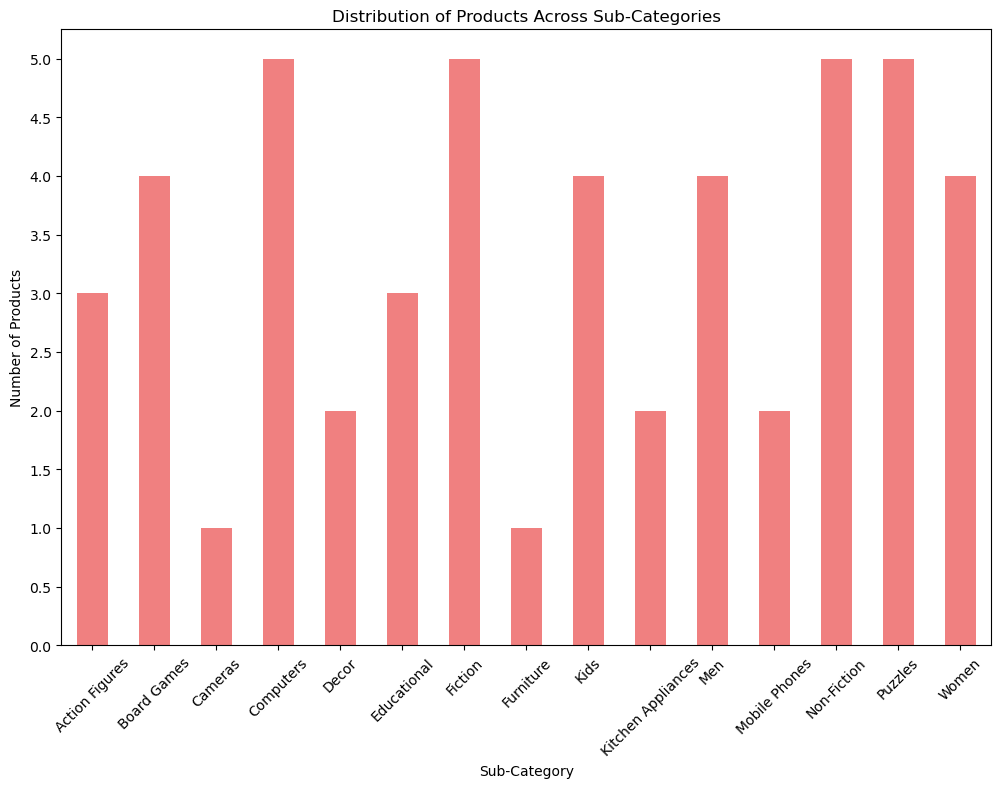

In [35]:
products_per_subcategory = product_data.groupby('sub_category')['product_id'].count()
print("\nTotal Number of Products by Sub-Category:")
print(products_per_subcategory)
products_per_subcategory.plot(kind='bar', figsize=(12, 8), color='lightcoral')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
max_count = products_per_subcategory.max()
plt.yticks(np.arange(0, max_count + 0.5, 0.5))
plt.show()

In [37]:
low_stock_threshold = product_data['stock']
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]
print("Products with Low Stock Levels:")
print(low_stock_products)
if not low_stock_products.empty:
    low_stock_products.plot(kind='bar', x='product_id', y=low_stock_threshold, figsize=(12, 6), color='orange')
    plt.title('Products with Low Stock Levels')
    plt.xlabel('Product Name')
    plt.ylabel('Stock Level')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No products with low stock levels.")


Products with Low Stock Levels:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []
No products with low stock levels.


In [39]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()
print(f"Average Selling Price: {average_selling_price:.2f}")
print(f"Maximum Selling Price: {maximum_selling_price:.2f}")
print(f"Minimum Selling Price: {minimum_selling_price:.2f}")


Average Selling Price: 256.97
Maximum Selling Price: 498.99
Minimum Selling Price: 13.78


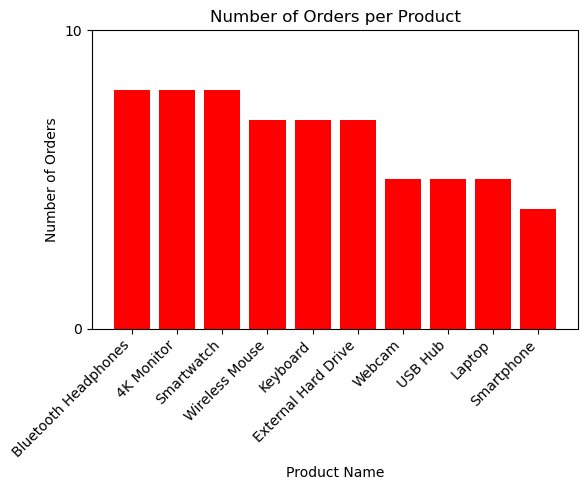

In [41]:

product_order_count = order_data.groupby('product_id').size()

product_order_count = product_order_count.reset_index(name='order_count')
product_order_count = pd.merge(product_order_count, product_data[['product_id', 'product_name']], on='product_id')

product_order_count = product_order_count.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(6, 5))
plt.bar(product_order_count['product_name'], product_order_count['order_count'], color='red')

plt.title('Number of Orders per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, product_order_count['order_count'].max() + 10, 10)) 
plt.tight_layout()
plt.show()


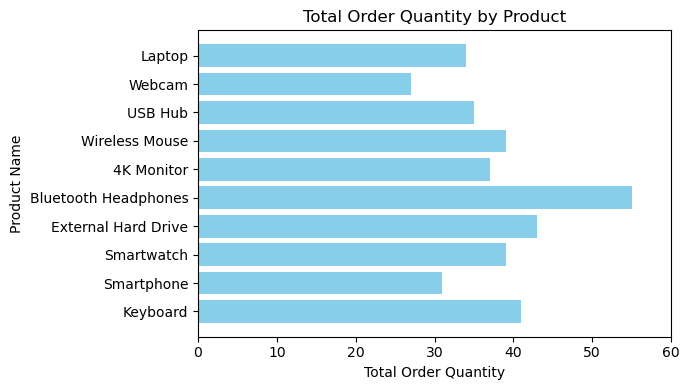

In [43]:
total_quantity_by_product = order_data.groupby('product_id')['quantity'].sum()
product_quantity_data = total_quantity_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
product_quantity_data = product_quantity_data.sort_values('quantity', ascending=True)
plt.figure(figsize=(7, 4))
plt.barh(product_quantity_data['product_name'], product_quantity_data['quantity'], color='skyblue')
plt.title('Total Order Quantity by Product')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(range(0, int(product_quantity_data['quantity'].max()) + 10, 10))  # X-axis ticks as multiples of 10
plt.tight_layout()
plt.show()


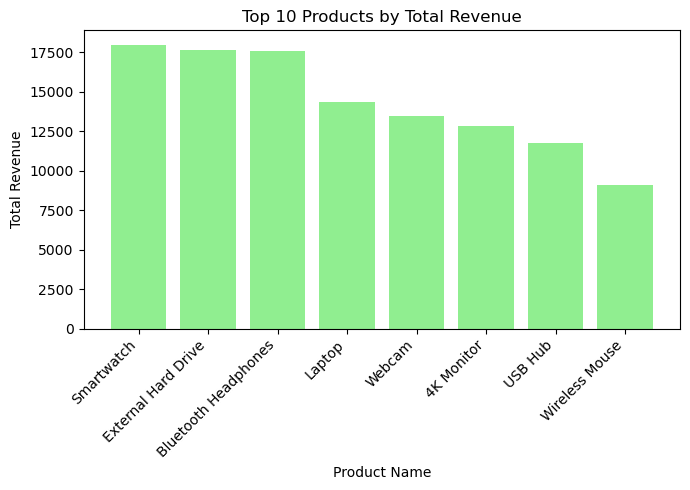

In [45]:
total_revenue_by_product = order_data.groupby('product_id')['total_price'].sum()
product_revenue_data = total_revenue_by_product.reset_index().merge(product_data[['product_id', 'product_name']], on='product_id')
top_10_products = product_revenue_data.sort_values('total_price', ascending=False).head(10)
plt.figure(figsize=(7,5))
plt.bar(top_10_products['product_name'], top_10_products['total_price'], color='lightgreen')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


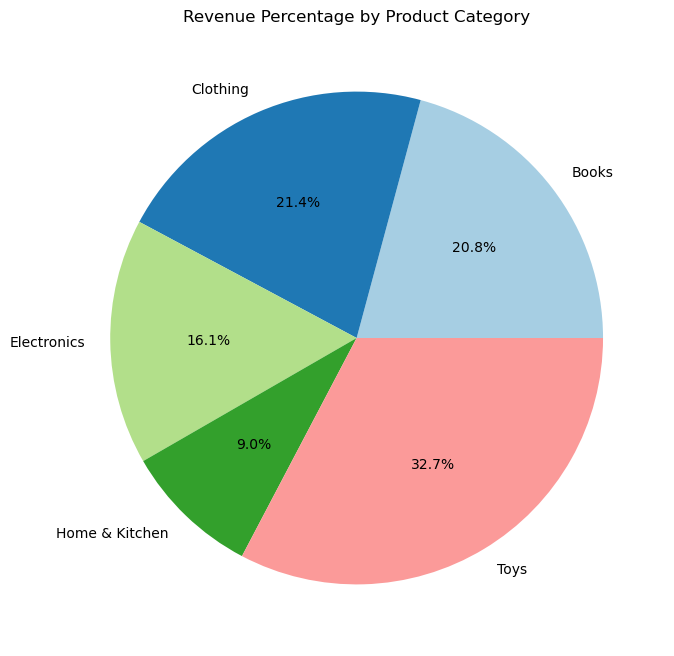

In [47]:
category_revenue = (
    order_data
    .merge(product_data[['product_id', 'category']], on='product_id')  
    .groupby('category')['total_price']
    .sum()
)
total_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
plt.figure(figsize=(10, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_revenue_percentage))))
plt.title('Revenue Percentage by Product Category')
plt.show()

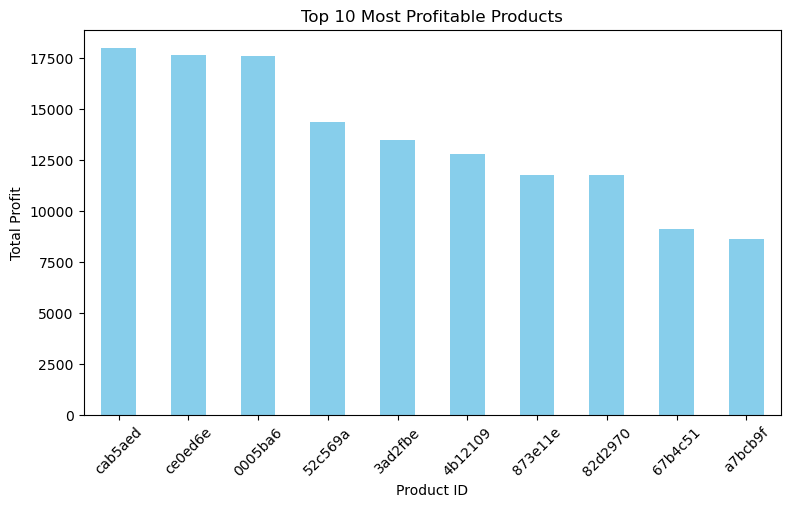

In [49]:
product_profit = (
    order_data
    .groupby('product_id')['total_price']
    .sum()
)
top_products = product_profit.sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

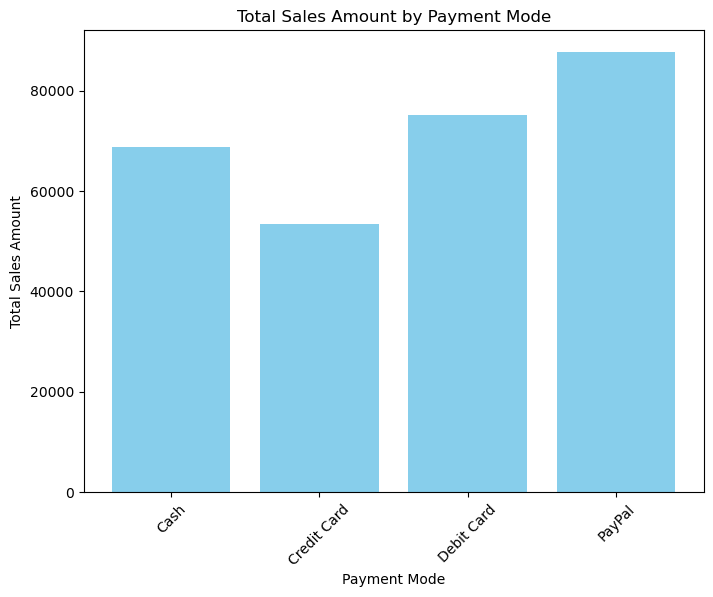

In [51]:
payment_mode_sales = (
    order_data
    .groupby('payment_mode')['total_price']
    .sum()
)
plt.figure(figsize=(8,6))
plt.bar(payment_mode_sales.index, payment_mode_sales, color='skyblue')
plt.title('Total Sales Amount by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

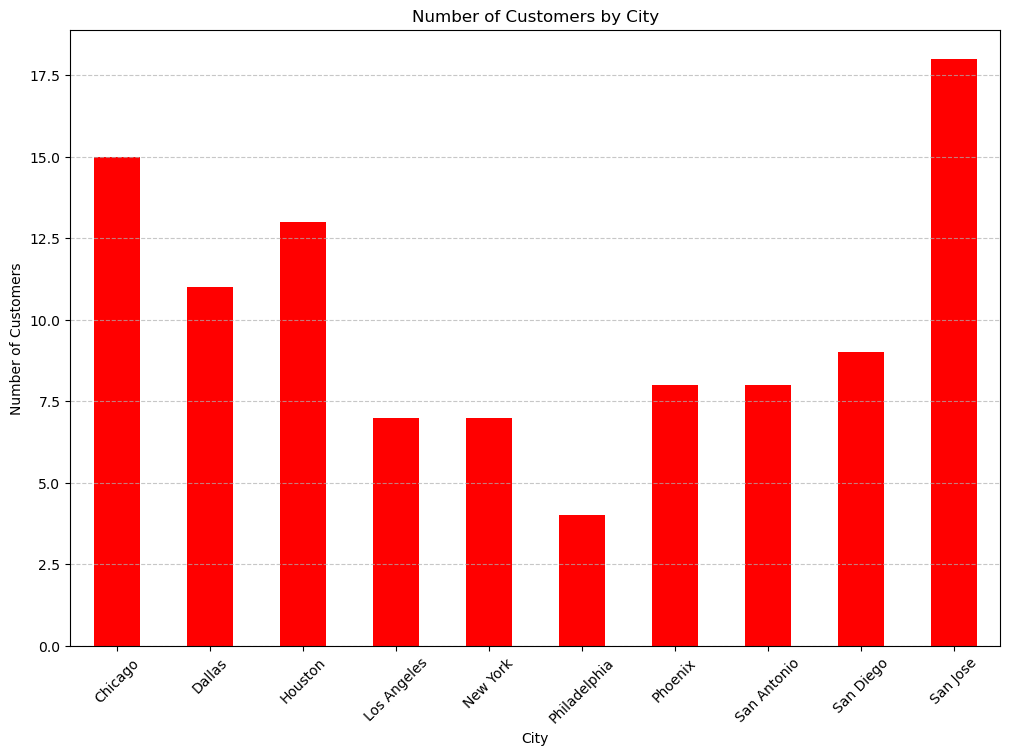

In [53]:
city_wise_customers = customer_data.groupby('city')['customer_id'].count()
plt.figure(figsize=(12, 8))
city_wise_customers.plot(kind='bar', color='red')
plt.title('Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

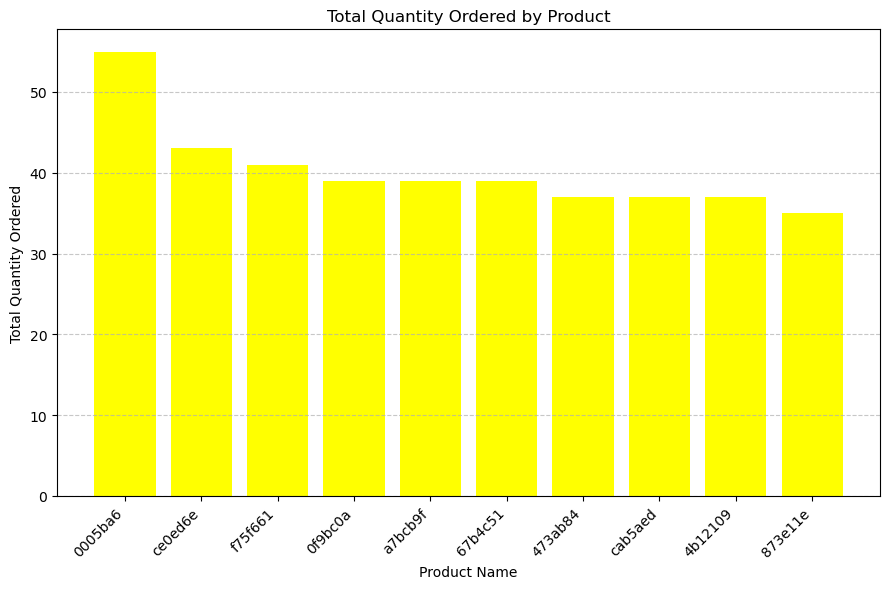

In [55]:
total_quantity_per_product = order_data.groupby('product_id')['quantity'].sum().reset_index()
total_quantity_per_product = total_quantity_per_product.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(9,6))
plt.bar(total_quantity_per_product['product_id'], total_quantity_per_product['quantity'], color='yellow')
plt.title('Total Quantity Ordered by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


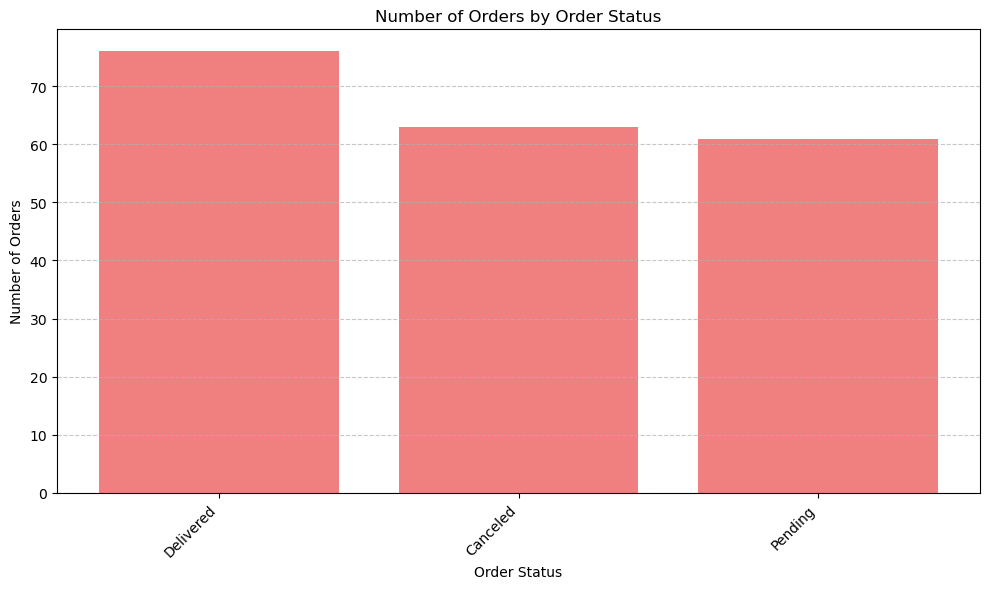

In [57]:
orders_by_status = order_data['order_status'].value_counts().reset_index()
orders_by_status.columns = ['order_status', 'number_of_orders']
plt.figure(figsize=(10, 6))
plt.bar(orders_by_status['order_status'], orders_by_status['number_of_orders'], color='lightcoral')
plt.title('Number of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()